In [54]:
#------Data Consolidation------
df_plus = pd.read_csv(r'disney_plus_titles.csv')
df_box = pd.read_csv(r'DisneyMoviesDataset.csv')
disney = pd.merge(df_box,
                 df_plus[['title', 'rating']],
                 on='title')
disney.to_csv(r'Disney_data.csv', index=False)



In [55]:
#-----------------Importing Data---------------
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets, linear_model, metrics
np.random.seed(19680801)

#----------------Loading Data-----------------
disney = pd.read_csv(r'Disney_data.csv')
disney = disney.set_index('title')

#---------Data Manipulation Methods ------------

#Read the name of columns of dataframe
def read_col(df):
    for col in df.columns:
        print(col)

In [56]:
#-----------------Cleaning Data------------------
#Drop unnecessary columns
disney = disney[["Running time (int)","Budget (float)",
                 "Box office (float)","Release date (datetime)","imdb",
                 "metascore","rotten_tomatoes","Directed by","Starring",
                 "Music by","Distributed by","rating"]]

#Remove row with empty cells
disney = disney.dropna()

#Formating data correctly (Removing brackets and dashes)
#Directed by
disney['Directed by']= disney['Directed by'].str.replace('[',"").str.split(",").str[0]
disney['Directed by'] = disney ['Directed by'].str.replace('\'',"")
#Starring
disney['Starring']= disney['Starring'].str.replace('[',"").str.split(",").str[0]
disney['Starring'] = disney ['Starring'].str.replace('\'',"")
#Music by
disney['Music by']= disney['Music by'].str.replace('[',"").str.split(",").str[0]
disney['Music by'] = disney ['Music by'].str.replace('\'',"")
#Distributed by
disney['Distributed by']= disney['Distributed by'].str.replace('[',"").str.split(",").str[0]
disney['Distributed by'] = disney ['Distributed by'].str.replace('\'',"")


#Seperating Months and year as two variables
disney_append = disney[['Release Year','Release Month','Release Day']] = disney['Release date (datetime)'].str.split('-', expand=True)
disney.join(disney_append)
disney = disney.drop(['Release date (datetime)','Release Day'], axis=1)


#Drop films made before 1968
disney.drop(disney[disney['Release Year'].astype(int) < 1968].index, inplace = True)


print("--------Dataset information--------")
print(disney)
read_col(disney)

#Save CSV file
disney.to_csv(r'Clean_Disney_data.csv', index=True)

--------Dataset information--------
                              Running time (int)  Budget (float)  \
title                                                              
The Aristocats                              79.0       4000000.0   
Bedknobs and Broomsticks                   118.0       6300000.0   
Robin Hood                                  83.0       5000000.0   
Freaky Friday                               95.0       5000000.0   
The Rescuers                                77.0       7500000.0   
...                                          ...             ...   
Toy Story 4                                100.0     200000000.0   
The Lion King                              118.0     250000000.0   
Maleficent: Mistress of Evil               119.0     185000000.0   
Onward                                     102.0     175000000.0   
Mulan                                      115.0     200000000.0   

                              Box office (float)  imdb  metascore  \
title     

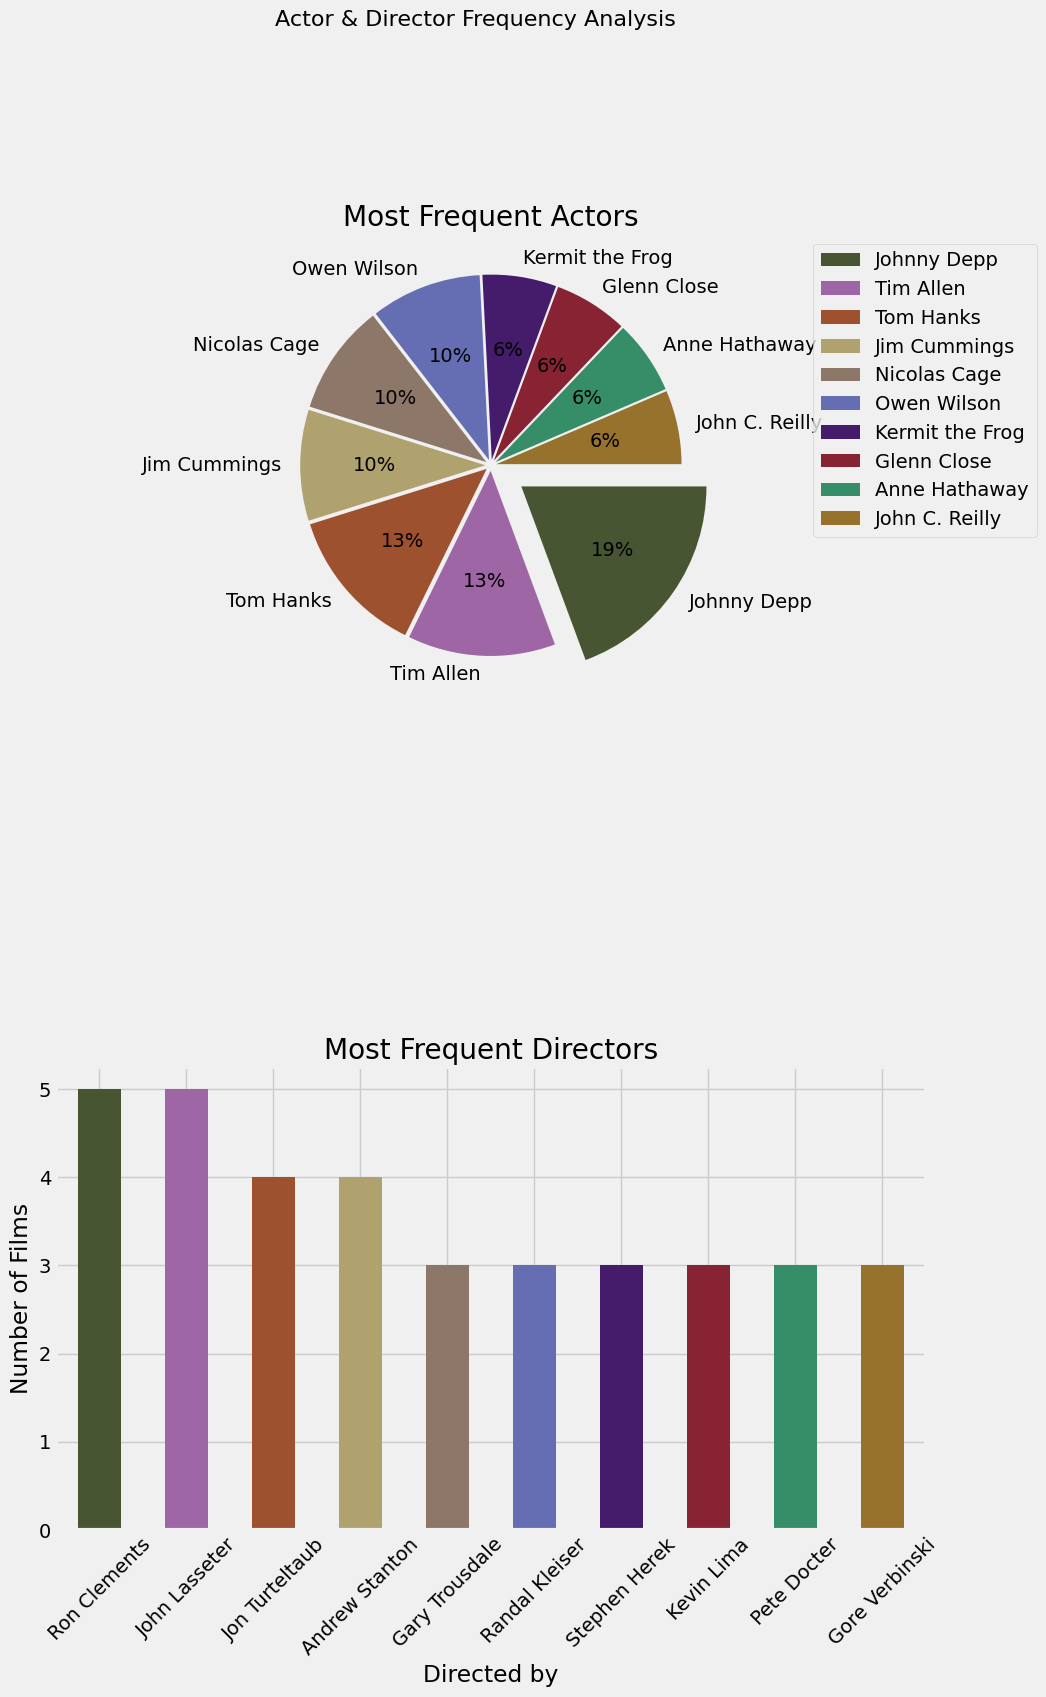

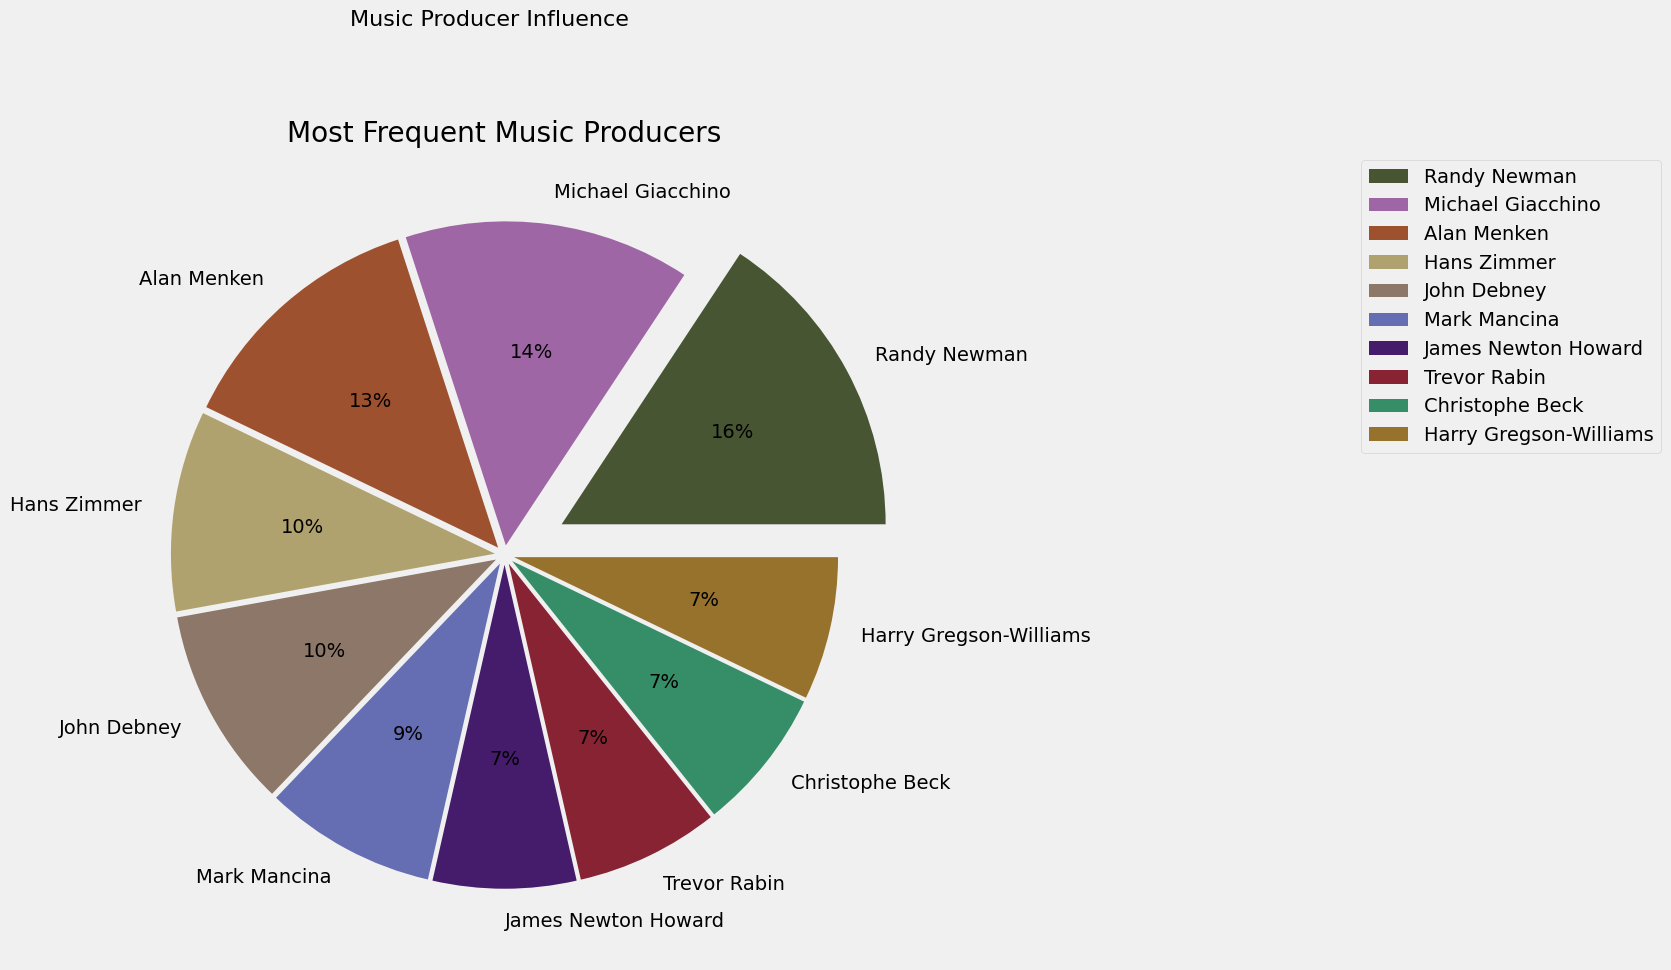

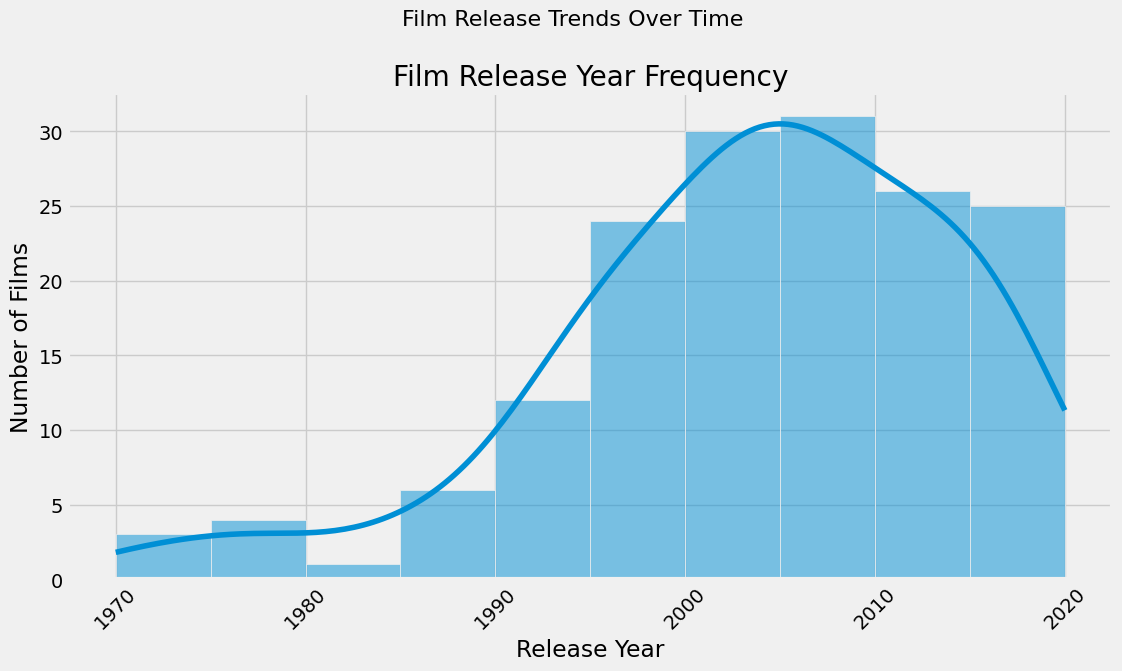

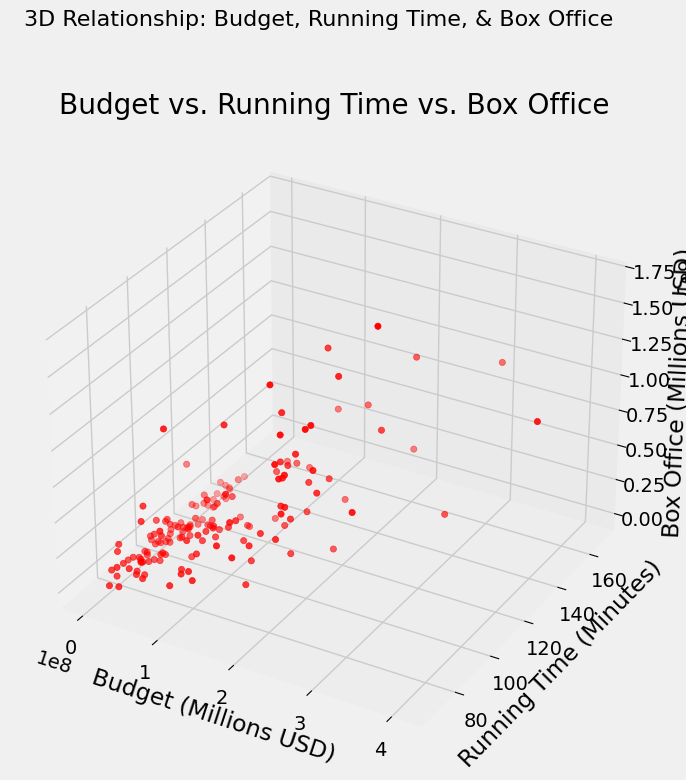

In [48]:
# --- Visuals Helper: Consistent Colors & Pie Chart Explosion ---
plot_colors = [] # Stores a list of RGB colors for chart elements
for _ in range(10):
    # Generates a random, distinct RGB color for each segment/bar
    plot_colors.append((random.uniform(0.1, 0.7), random.uniform(0.1, 0.7), random.uniform(0.1, 0.7)))

pie_explode_effect = [] # Controls how much each pie slice "explodes" from the center
for _ in range(10):
    pie_explode_effect.append(0.03)
# Makes the first slice stand out more by exploding further
if len(pie_explode_effect) > 0:
    pie_explode_effect[0] = 0.2


# --- Figure 1: Most Frequent Actors (Pie Chart) & Directors (Bar Chart) ---
# Sets up a figure with two subplots stacked vertically for comparison.
fig1, axes1 = plt.subplots(2, 1, figsize=(10, 16))

# Plotting the pie chart for top actors on the upper subplot.
pie1 = disney["Starring"].value_counts()[:10].plot(
    ax=axes1[0],
    kind="pie",
    autopct="%1.0f%%", # Displays percentages on slices
    colors=plot_colors,
    explode=pie_explode_effect,
    counterclock=False, # Slices are drawn clockwise
    ylabel="", # Removes default y-label which can clutter pie charts
    title="Most Frequent Actors"
)
# Places the legend for actors outside the pie chart to avoid overlap.
pie1.legend(bbox_to_anchor=(1, 0, 0.7, 1), loc="upper right")

# Plotting the bar chart for top directors on the lower subplot.
disney["Directed by"].value_counts()[:10].plot(
    ax=axes1[1],
    kind="bar",
    color=plot_colors # Uses the same color scheme
)
axes1[1].set_title("Most Frequent Directors")
axes1[1].set_ylabel("Number of Films")
# Rotates x-axis labels to prevent overlap, especially with long names.
axes1[1].tick_params(axis='x', rotation=45)

# Adjusts vertical spacing between the two subplots for better separation.
plt.subplots_adjust(hspace=0.8)
# Sets an overall title for this figure.
plt.suptitle("Actor & Director Frequency Analysis", y=1.02, fontsize=16)
plt.show() # Displays Figure 1
#fig1.savefig('actors_directors_analysis.png', bbox_inches='tight') # Exports Figure 1 to a PNG file


# --- Figure 2: Most Frequent Music Producers (Pie Chart) ---
# Creates a single subplot for the music producer pie chart.
fig2, axes2 = plt.subplots(1, 1, figsize=(10, 10)) # Adjusted to a single plot, size adjusted

# Plotting the pie chart for top music producers.
pie2 = disney["Music by"].value_counts()[:10].plot(
    ax=axes2, # Assigns to the single subplot
    kind="pie",
    autopct="%1.0f%%",
    colors=plot_colors,
    explode=pie_explode_effect,
    counterclock=True, # Slices are drawn counter-clockwise
    ylabel="",
    title="Most Frequent Music Producers"
)
# Adjusted bbox_to_anchor to move the legend further to the right.
# The first value (x-coordinate) is increased.
pie2.legend(bbox_to_anchor=(1.5, 0, 0.44, 1), loc="upper right")

# Sets an overall title for this figure.
plt.suptitle("Music Producer Influence", y=1.02, fontsize=16)
plt.show() # Displays Figure 2
fig2.savefig('music_producer_influence.png', bbox_inches='tight') # Exports Figure 2 to a PNG file


# --- Figure 3: Release Year Frequency (Histogram) ---
# Creates a single subplot for the histogram.
fig3, axes3 = plt.subplots(1, 1, figsize=(12, 6))

# Plots a histogram showing the distribution of film release years.
sns.histplot(disney, x="Release Year", kde=True, ax=axes3)
axes3.set_title("Film Release Year Frequency")
axes3.set_xlabel("Release Year")
axes3.set_ylabel("Number of Films")

# Dynamically determines the range of years for x-axis ticks.
min_year = disney["Release Year"].min()
max_year = disney["Release Year"].max()

# Sets x-axis ticks to display every 10 years, improving readability for dense data.
axes3.set_xticks(np.arange(min_year, max_year + 1, 10))
# Rotates x-axis labels to prevent overlap.
axes3.tick_params(axis="x", rotation=45)

# Sets an overall title for this figure.
plt.suptitle("Film Release Trends Over Time", y=1.02, fontsize=16)
plt.show() # Displays Figure 3
fig3.savefig('release_year_frequency.png', bbox_inches='tight') # Exports Figure 3 to a PNG file


# --- Figure 4: 3D Scatter Plot (Budget vs. Running Time vs. Box Office) ---
# Creates a new figure specifically for the 3D plot.
fig4 = plt.figure(figsize=(10, 8))
# Adds a 3D subplot to the figure.
ax4 = fig4.add_subplot(111, projection='3d')

# Plots the scatter points in 3D.
ax4.scatter(disney["Budget (float)"], disney["Running time (int)"], disney["Box office (float)"], color="red")
# Labels for each axis to indicate what they represent.
ax4.set_xlabel("Budget (Millions USD)")
ax4.set_ylabel("Running Time (Minutes)")
ax4.set_zlabel("Box Office (Millions USD)")
ax4.set_title("Budget vs. Running Time vs. Box Office")

# Sets an overall title for this figure.
plt.suptitle("3D Relationship: Budget, Running Time, & Box Office", y=1.02, fontsize=16)
plt.show() # Displays Figure 4
fig4.savefig('3d_budget_runningtime_boxoffice.png', bbox_inches='tight') # Exports Figure 4 to a PNG file


The features that are examined in our dataset are:
Coefficients:  [-7.11547099e+04  2.72540716e+00  2.57726164e+07  5.91370927e+06
  1.83365920e+06  4.17917641e+06]
Variance score: 0.6521234051976281


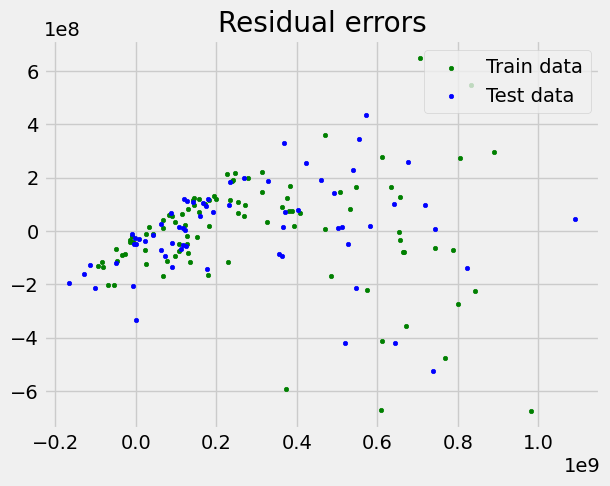

In [31]:
#------Model Creation:Version 1----------

#Removing dummy variables
df = disney.drop(['rotten_tomatoes','Directed by','Starring','Music by','Distributed by','rating'], axis=1)
print("The features that are examined in our dataset are:")
#read_col(df)

# defining feature multiple variables(X) and Box Office(y)
X = df.drop(['Box office (float)'], axis=1)

y = df.values[:,2]

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

# create linear regression object
reg = linear_model.LinearRegression()

# train the model using the training sets
reg.fit(X_train, y_train)


# regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

# plot for residual error

## setting plot style
plt.style.use('fivethirtyeight')

## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')

## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

## plotting legend
plt.legend(loc = 'upper right')

## plot title
plt.title("Residual errors")

## method call for showing the plot
plt.show()

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/Images/1-Capture.PNG') #Replace "image.jpg" with the path of your image
plt.imshow(img)
plt.axis('off')
plt.show()


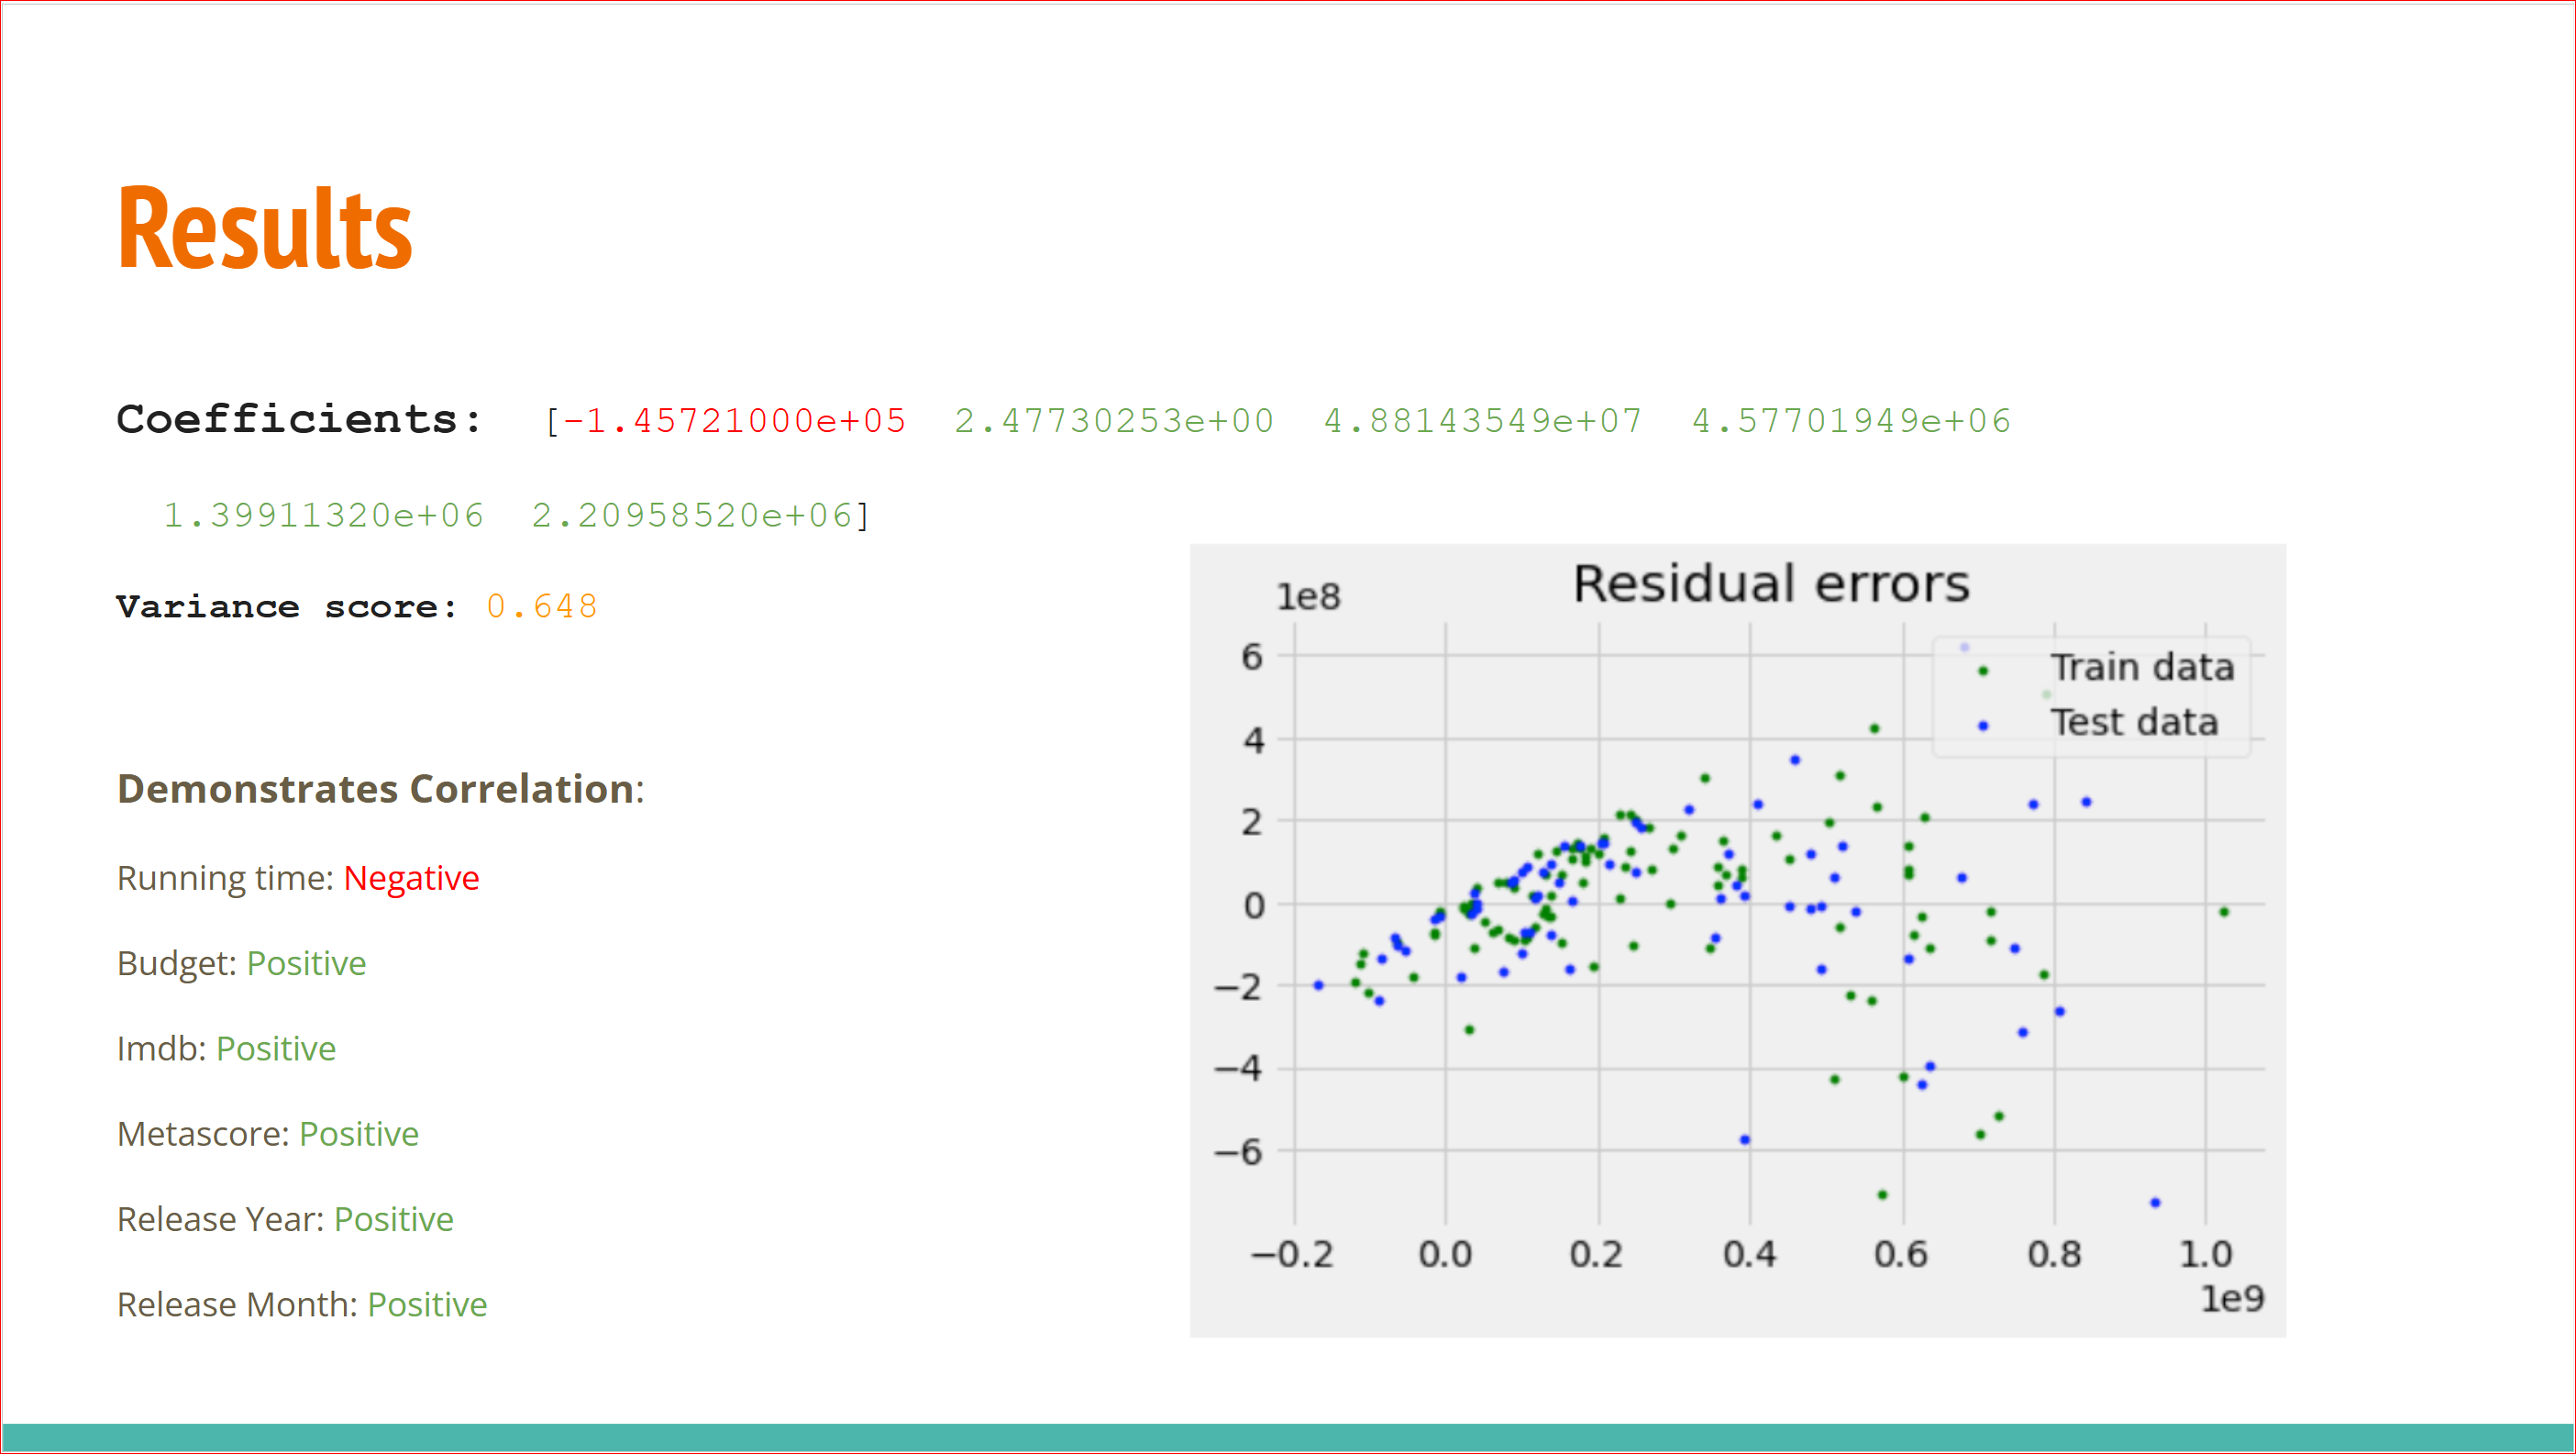

In [ ]:
from PIL import Image

img = Image.open('/content/Images/1-Capture.PNG')
display(img)



Original NaN counts in numerical columns of df_for_model:
Release Year      0
Budget (float)    0
dtype: int64

NaN counts after numerical imputation:
Release Year      0
Budget (float)    0
dtype: int64

Model training successful.
Linear Regression Coefficients: [ 4.94639311e+06  2.61118128e+00 -2.20978727e+08 -1.32651938e+07
 -1.45055029e+08 -8.22663820e+07  6.78846971e+07  2.31984585e+08
  5.37014706e+07 -5.87833857e+06 -4.23784643e+07  1.28032162e+07
  6.76807424e+07  7.57674234e+07]
Variance Score (R^2): 0.49


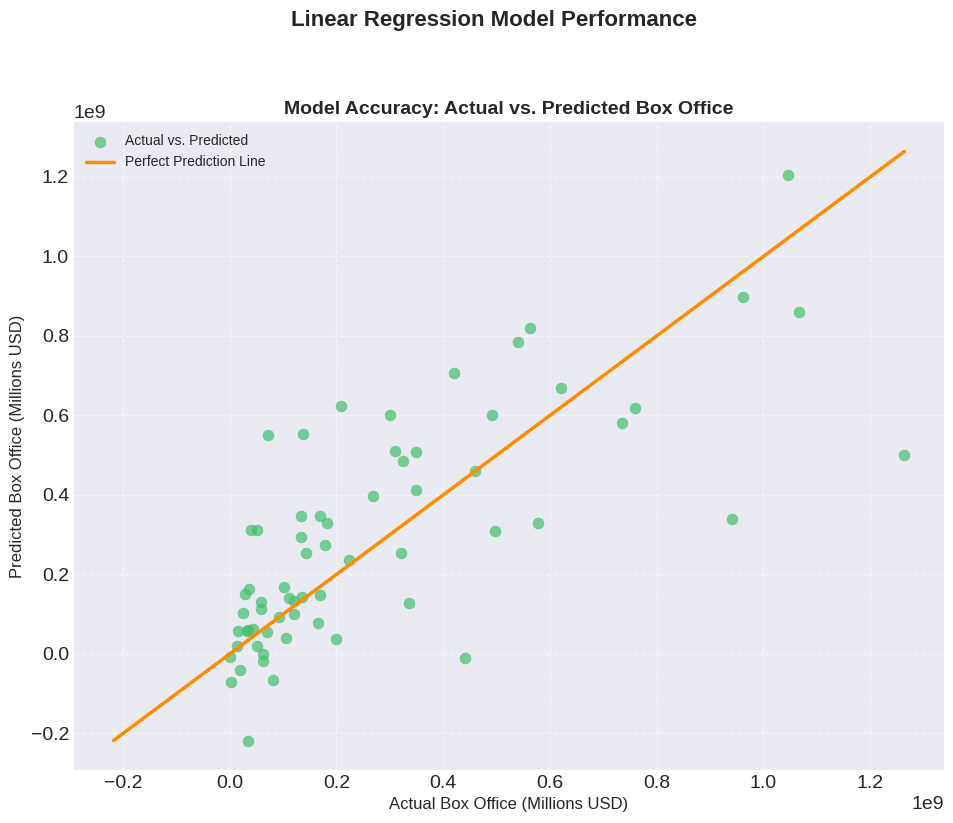

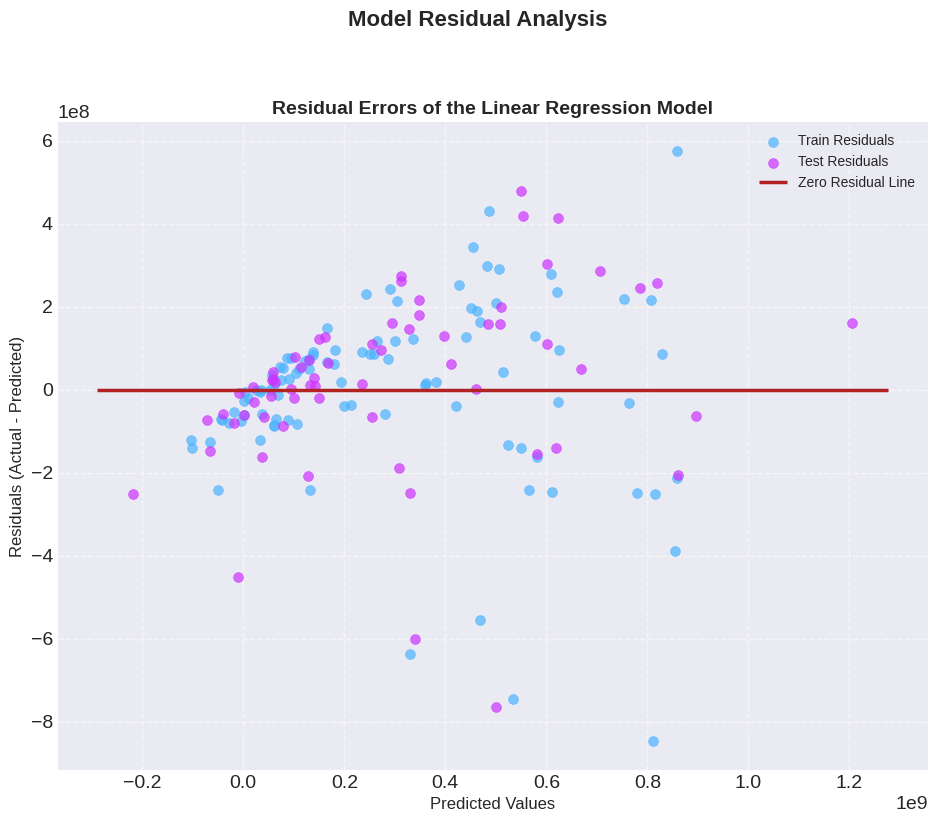

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Set a visually appealing matplotlib style for the plots.
plt.style.use('seaborn-v0_8-darkgrid')


# Identify numerical features that actually exist in the DataFrame and have some non-missing values.
# This prevents errors if a specified feature is entirely empty or missing from the data.
numerical_features_for_imputation = [
    col for col in numerical_features_raw
    if col in disney.columns and disney[col].isnull().sum() < len(disney[col])
]

# Check if the target column is valid. The model can't proceed if it's missing or all NaN.
if target_column not in disney.columns or disney[target_column].isnull().all():
    print(f"Error: Target column '{target_column}' is missing or contains all NaN values. Cannot train model.")
    exit()

# Filter categorical features to ensure they exist in the DataFrame.
categorical_features_for_encoding = [
    col for col in categorical_features_raw if col in disney.columns
]

# Create a working DataFrame with only the relevant columns for the model.
all_model_cols = numerical_features_for_imputation + categorical_features_for_encoding + [target_column]
df_for_model = disney[all_model_cols].copy()

# 3. Handle missing numerical values using mean imputation.
# This fills in NaN values in numerical columns with the mean of that column,
# ensuring the model has complete numerical data.
print(f"Original NaN counts in numerical columns of df_for_model:\n{df_for_model[numerical_features_for_imputation].isnull().sum()}")

imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the selected numerical features.
# The result is a NumPy array, so it's converted back to a Pandas DataFrame.
imputed_numerical_df = pd.DataFrame(imputer.fit_transform(df_for_model[numerical_features_for_imputation]),
                                    columns=numerical_features_for_imputation,
                                    index=df_for_model.index)

# Impute the target column separately if it has NaNs.
if df_for_model[target_column].isnull().any():
    target_imputer = SimpleImputer(strategy='mean')
    df_for_model[target_column] = target_imputer.fit_transform(df_for_model[[target_column]])

print(f"\nNaN counts after numerical imputation:\n{imputed_numerical_df.isnull().sum()}")

# 4. Convert categorical features into numerical format using one-hot encoding.
# This creates new binary (0 or 1) columns for each unique category (e.g., 'Release Month_January').
encoded_categorical_df = pd.get_dummies(df_for_model[categorical_features_for_encoding],
                                        columns=categorical_features_for_encoding,
                                        prefix=categorical_features_for_encoding,
                                        dummy_na=False)

# 5. Combine all processed numerical and one-hot encoded features with the target column.
df_for_model_processed = pd.concat([imputed_numerical_df,
                                    encoded_categorical_df,
                                    df_for_model[target_column]], axis=1)

# Convert 'Release Year' to integer after imputation.
if 'Release Year' in df_for_model_processed.columns:
    df_for_model_processed['Release Year'] = df_for_model_processed['Release Year'].astype(int)
# Convert 'Running time (int)' to integer if it was included in the features.
if 'Running time (int)' in df_for_model_processed.columns:
    df_for_model_processed['Running time (int)'] = df_for_model_processed['Running time (int)'].astype(int)

# --- Model Training ---

# Check if the processed DataFrame contains data. If empty, the model cannot be trained.
if df_for_model_processed.empty:
    print("Error: DataFrame is empty after cleaning and imputation. Cannot train model.")
else:
    # Define features (X) for the model by dropping the target column.
    X = df_for_model_processed.drop(columns=[target_column])
    # Define the target variable (y).
    y = df_for_model_processed[target_column]

    # Ensure enough data points exist to perform a train/test split.
    if len(X) < 2:
        print(f"Error: Not enough data points ({len(X)} available) to perform train/test split. Need at least 2.")
    else:
        try:
            # Split the data into training and testing sets.
            # 40% of the data is used for testing, 60% for training. random_state ensures reproducibility.
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

            # Initialize and train the Linear Regression model using the training data.
            reg_model = LinearRegression()
            reg_model.fit(X_train, y_train)

            # Generate predictions on the test set to evaluate how well the model performs on unseen data.
            y_pred = reg_model.predict(X_test)

            print("\nModel training successful.")
            print(f"Linear Regression Coefficients: {reg_model.coef_}")
            print(f"Variance Score (R^2): {reg_model.score(X_test, y_test):.2f}")


            # --- Figure 5: Actual vs. Predicted Box Office (Model Accuracy) ---
            # Creates a plot to visually compare actual box office values against predicted ones.
            fig5, axes5 = plt.subplots(1, 1, figsize=(10, 8))

            # Scatter plot of actual vs. predicted values.
            scatter_color_actual_pred = sns.color_palette("viridis", as_cmap=True)(0.7) # Defines a color from a palette

            axes5.scatter(y_test, y_pred,
                          color=scatter_color_actual_pred,
                          alpha=0.7, # Adjusts marker transparency
                          s=60,      # Sets marker size
                          label='Actual vs. Predicted')

            # Draw a diagonal line representing a perfect prediction (where actual equals predicted).
            max_val = max(y_test.max(), y_pred.max())
            min_val = min(y_test.min(), y_pred.min())
            axes5.plot([min_val, max_val], [min_val, max_val],
                       color='darkorange', # Sets line color
                       linestyle='-',      # Solid line style
                       linewidth=2.5,      # Sets line thickness
                       label='Perfect Prediction Line')

            # Set plot labels and title.
            axes5.set_xlabel("Actual Box Office (Millions USD)", fontsize=12)
            axes5.set_ylabel("Predicted Box Office (Millions USD)", fontsize=12)
            axes5.set_title("Model Accuracy: Actual vs. Predicted Box Office", fontsize=14, fontweight='bold')
            axes5.legend(loc='upper left', fontsize=10) # Position and size of the legend
            axes5.grid(True, linestyle='--', alpha=0.6) # Adds a grid for better readability

            # Set an overall title for the entire figure.
            plt.suptitle("Linear Regression Model Performance", y=1.02, fontsize=16, fontweight='bold')
            plt.show() # Displays the plot
            fig5.savefig('model_accuracy_actual_vs_predicted.png', bbox_inches='tight') # Saves the plot to a file

            # --- Figure 6: Residual Errors Plot (Model Diagnostics) ---
            # Creates a plot to visualize the model's prediction errors (residuals).
            fig6, axes6 = plt.subplots(1, 1, figsize=(10, 8))

            # Plot residuals for the training data (predicted values vs. prediction errors).
            train_residual_color = sns.color_palette("cool", as_cmap=True)(0.3)
            test_residual_color = sns.color_palette("cool", as_cmap=True)(0.8)

            axes6.scatter(reg_model.predict(X_train), reg_model.predict(X_train) - y_train,
                        color=train_residual_color, s=50, alpha=0.7, label='Train Residuals')

            # Plot residuals for the test data.
            axes6.scatter(y_pred, y_pred - y_test,
                        color=test_residual_color, s=50, alpha=0.7, label='Test Residuals')

            # Draw a horizontal line at y=0, indicating where errors would be zero.
            axes6.hlines(y=0, xmin=axes6.get_xlim()[0], xmax=axes6.get_xlim()[1],
                        linewidth=2.5, color='firebrick', linestyle='-', label='Zero Residual Line')

            # Set plot labels and title.
            axes6.set_xlabel("Predicted Values", fontsize=12)
            axes6.set_ylabel("Residuals (Actual - Predicted)", fontsize=12)
            axes6.set_title("Residual Errors of the Linear Regression Model", fontsize=14, fontweight='bold')
            axes6.legend(loc='upper right', fontsize=10)
            axes6.grid(True, linestyle='--', alpha=0.6)

            # Set an overall title for the entire figure.
            plt.suptitle("Model Residual Analysis", y=1.02, fontsize=16, fontweight='bold')
            plt.show() # Displays the plot
            fig6.savefig('model_residuals_plot.png', bbox_inches='tight') # Saves the plot to a file

        except ValueError as e:
            print(f"Error during train/test split or model training: {e}")
            print("This usually happens if the dataset is too small after cleaning or if there are issues with the data distribution.")
